In [91]:
import pyedflib
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA


In [92]:
from load_data import Subject_Session_Data
from preprocess import butter_bandpass_filter

In [4]:
work_dir = os.path.dirname(os.path.dirname(os.getcwd()))
dataset_dir = os.path.join(work_dir, "enterface06_EMOBRAIN", "Data")
dataset_common_dir = os.path.join(dataset_dir, "Common")
dataset_EEG_dir = os.path.join(dataset_dir, "EEG")
dataset_fNIRS_dir = os.path.join(dataset_dir, "fNIRS")

print("working with dataset directory:", dataset_dir)

# Construct the search pattern
pattern = os.path.join(dataset_EEG_dir, "*.bdf")

# Find all files in the directory matching the pattern
bdf_files = glob.glob(pattern)

count = 1
data_list = []
for file in bdf_files:
        # Open the BDF file
        try:
                with pyedflib.EdfReader(file) as f:
                        print("reading file :", count)
                        data_list.append(Subject_Session_Data(f, count))
                        '''
                        # Get general information
                        print("reading file :", count)
                        print("File duration in seconds:", f.file_duration)
                        print("Number of signals:", f.signals_in_file)
                        signal_labels = f.getSignalLabels()
                        print("Signal labels:", signal_labels)

                        # Read data from each signal
                        for i in range(f.signals_in_file):
                                data = f.readSignal(i)
                                print(f"Data from signal {signal_labels[i]}:", data)
                        '''
        except (OSError):
                print("reading file :", count, "FAIL")
        count += 1

working with dataset directory: c:\Users\LyuxingHe\Desktop\GitRepos\M2S\enterface06_EMOBRAIN\Data
reading file : 1
reading file : 2
reading file : 3
reading file : 4
reading file : 5
reading file : 6
reading file : 7
reading file : 8
reading file : 9
reading file : 10
reading file : 11
reading file : 12
reading file : 13
reading file : 14
reading file : 15


In [86]:
data_list[0].display_info()

file number: 1
File duration in seconds: 1325
Number of signals: 73
Label: Fp1
[259381.88010185 259381.34885283 259381.63010231 ... 259351.44265809
 259351.41140815 259351.0051589 ]
Label: AF7
[259397.78632246 259397.72382258 259397.88007229 ... 259359.72389279
 259359.5051432  259359.72389279]
Label: AF3
[-2866.44782945 -2876.04156173 -2883.88529723 ... -1153.07599533
 -1143.54476294 -1147.76350515]
Label: F1
[-6019.723253   -6030.87948238 -6035.75447337 ... -1025.23248155
 -1016.10749841 -1021.38873866]
Label: F3
[-534.70213793 -547.04586512 -558.48334399 ... 1648.16882868 1659.20005829
 1655.85631447]
Label: F5
[-9569.02919477 -9582.81041931 -9596.74789356 ... -8982.18652911
 -8967.74905579 -8969.59280238]
Label: F7
[1431.04422987 1120.57605353  824.20160116 ... 2898.82276778 3045.38499697
 2936.82269757]
Label: FT7
[-5552.38036653 -5562.72409741 -5573.94282668 ... -4048.44564542
 -4035.44566944 -4041.50815824]
Label: FC5
[-441.3585604  -457.35853084 -469.29600878 ... -115.39041271 

In [93]:
test_signal = data_list[0]
fs = 1024

In [94]:
def plot_signal(data, title):
    t = np.arange(data.shape[0])
    plt.figure(figsize=(12,5))
    plt.plot(t,data)
    plt.xlim([t[0],t[-1]])
    plt.ylim([min(data), max(data)])
    plt.xlabel('time (sec)')
    plt.grid()
    plt.title(title)
    plt.show()

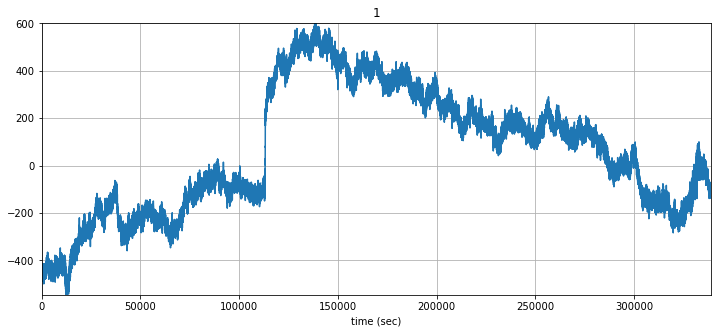

In [119]:
test_signal_labels = test_signal.signal_labels
test_data_dic = test_signal.data_dictionary
index = 8
test_data = test_data_dic[test_signal_labels[index]]

plot_signal(test_data, '1')

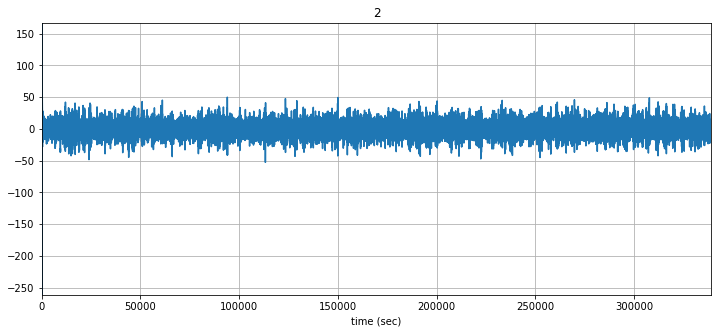

In [120]:
# bandpass in the 4-45 Hz range
lowcut = 4
highcut = 45
filtered = butter_bandpass_filter(test_data, lowcut, highcut, fs)

plot_signal(filtered, '2')

In [99]:
signals_2d = [butter_bandpass_filter(test_data_dic[key], lowcut, highcut, fs) for key in test_data_dic]
signals_2d = np.array(signals_2d)

ica = FastICA(n_components=20)
ica_sources = ica.fit_transform(signals_2d)
reconstructed_signals = ica.inverse_transform(ica_sources)

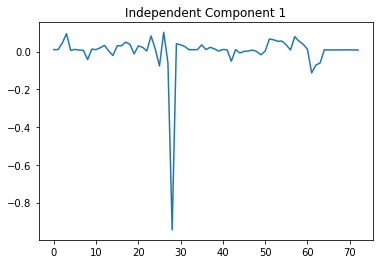

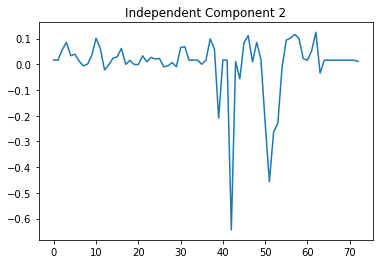

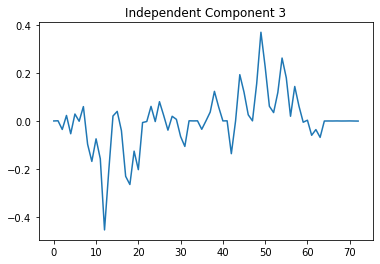

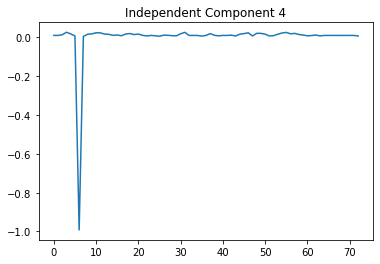

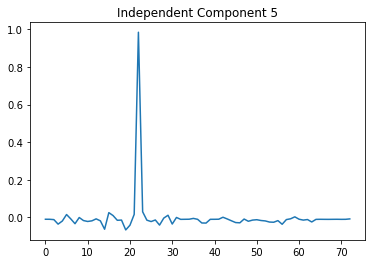

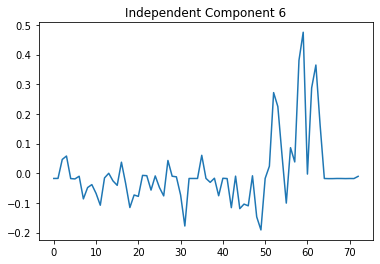

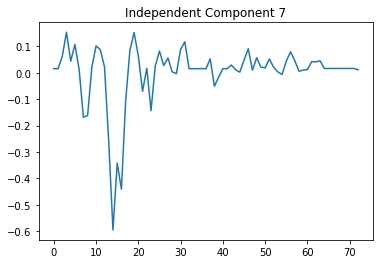

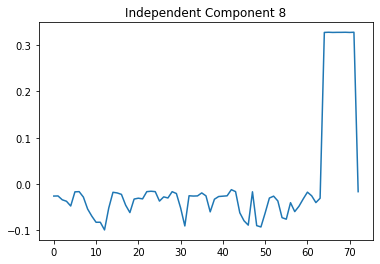

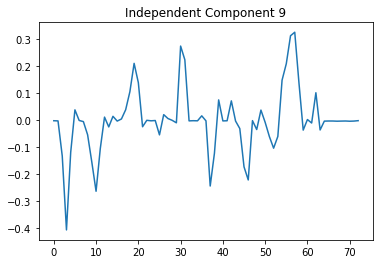

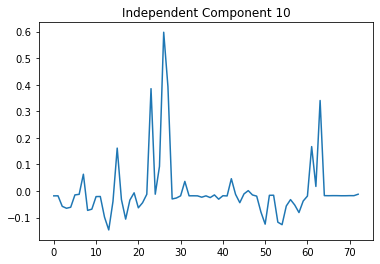

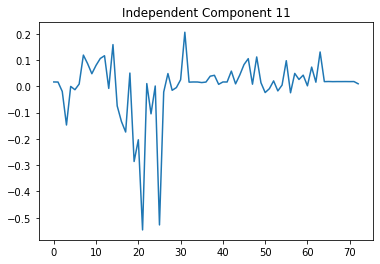

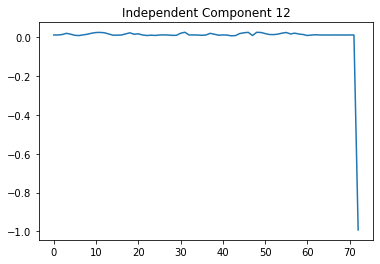

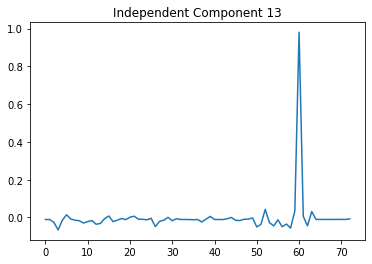

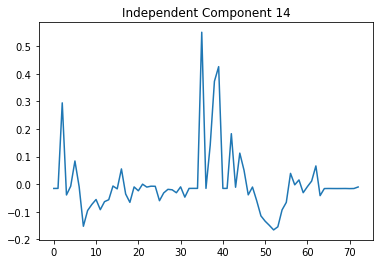

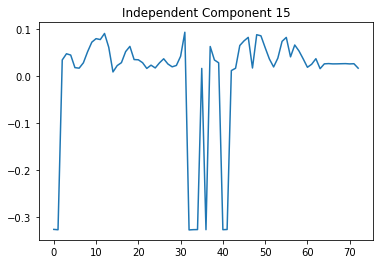

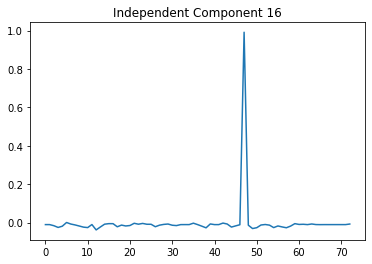

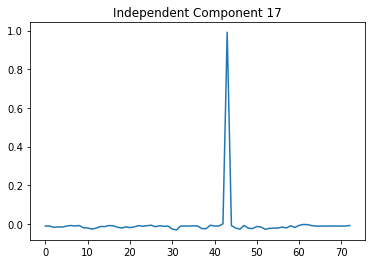

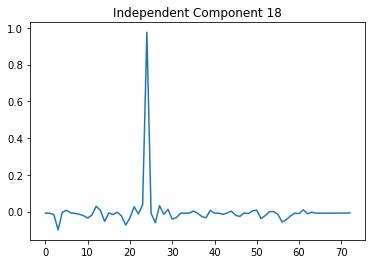

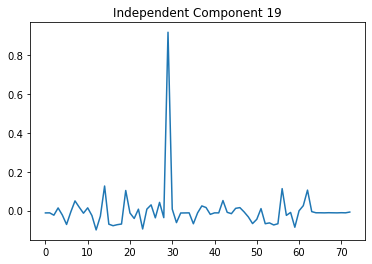

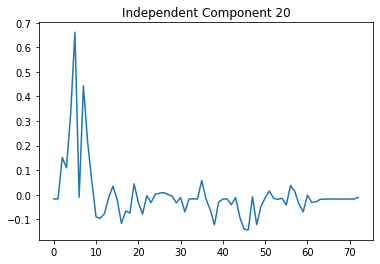

In [112]:
# Plotting the components
for i, comp in enumerate(ica_sources.T):
    plt.figure()
    plt.plot(comp)
    plt.title(f'Independent Component {i+1}')

plt.show()

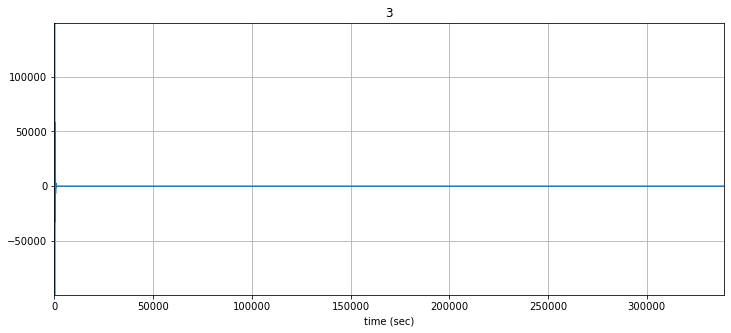

In [111]:
plot_signal(reconstructed_signals[1], '3')